In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_excel("/content/drive/My Drive/Corona/Train_dataset (1).xlsx",sheet_name='Train_dataset')

In [ ]:
data.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,0,Hypertension,68,8,<400,Normal,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,0,Diabetes,64,15,<100,Stage-02,NaN,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,0,None,19,13,<300,Elevated,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,0,Coronary Heart Disease,33,9,<200,Stage-01,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,0,Diabetes,23,7,<400,Normal,390.0,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


## Drop unnecessary columns

In [ ]:
columns_to_drop = ["Designation","Name","Insurance","salary","people_ID"]

In [ ]:
data_clean = data.drop(columns_to_drop,axis=1)

In [ ]:
#data_clean = data_clean.apply(lambda col: le.fit_transform(col.astype(str)))

In [4]:
data_clean.head(n=10);

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 23 columns):
Region                    10714 non-null object
Gender                    10714 non-null object
Married                   10714 non-null object
Children                  10403 non-null float64
Occupation                9967 non-null object
Mode_transport            10711 non-null object
cases/1M                  10714 non-null int64
Deaths/1M                 10714 non-null int64
comorbidity               10488 non-null object
Age                       10714 non-null int64
Coma score                10714 non-null int64
Pulmonary score           10714 non-null object
cardiological pressure    10617 non-null object
Diuresis                  9998 non-null float64
Platelets                 9790 non-null float64
HBB                       10698 non-null float64
d-dimer                   9600 non-null float64
Heart rate                9600 non-null float64
HDL cholesterol           1067

## Finding the number of NA values in each column

In [ ]:
data_clean.isna().sum()

Region                    0
Gender                    0
Married                   0
Children                  0
Occupation                0
Mode_transport            0
cases/1M                  0
Deaths/1M                 0
comorbidity               0
Age                       0
Coma score                0
Pulmonary score           0
cardiological pressure    0
Diuresis                  0
Platelets                 0
HBB                       0
d-dimer                   0
Heart rate                0
HDL cholesterol           0
Charlson Index            0
Blood Glucose             0
FT/month                  0
Infect_Prob               0
dtype: int64

## Filling NA values with 0 in children column and None in object columns

In [ ]:
data_clean[['Children']] = data_clean[['Children']].fillna(value=0)

In [ ]:
data_clean['Occupation'].fillna("no info", inplace=True)
data_clean['comorbidity'].fillna("None", inplace=True)
data_clean['Mode_transport'].fillna("None", inplace=True)
data_clean['cardiological pressure'].fillna("None", inplace=True)

## Filling mean values in float columns

In [ ]:
data_clean['Diuresis'].fillna(data_clean['Diuresis'].mean(), inplace=True)
data_clean['Platelets'].fillna(data_clean['Platelets'].mean(), inplace=True)
data_clean['d-dimer'].fillna(data_clean['d-dimer'].mean(), inplace=True)
data_clean['Heart rate'].fillna(data_clean['Heart rate'].mean(), inplace=True)
data_clean['FT/month'].fillna(data_clean['FT/month'].mean(), inplace=True)
data_clean['HDL cholesterol'].fillna(data_clean['HDL cholesterol'].mean(), inplace=True)
data_clean['HBB'].fillna(data_clean['HBB'].mean(), inplace=True)

## Removing duplicate columns if any

In [ ]:
duplicate_rows_df = data_clean[data_clean.duplicated()]
print(duplicate_rows_df.shape)

(0, 23)


In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 23 columns):
Region                    10714 non-null int64
Gender                    10714 non-null int64
Married                   10714 non-null int64
Children                  10714 non-null float64
Occupation                10714 non-null int64
Mode_transport            10714 non-null object
cases/1M                  10714 non-null int64
Deaths/1M                 10714 non-null int64
comorbidity               10714 non-null int64
Age                       10714 non-null int64
Coma score                10714 non-null int64
Pulmonary score           10714 non-null int64
cardiological pressure    10714 non-null object
Diuresis                  10714 non-null float64
Platelets                 10714 non-null float64
HBB                       10714 non-null float64
d-dimer                   10714 non-null float64
Heart rate                10714 non-null float64
HDL cholesterol           10714

## Label encoding the object columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data_clean["Gender"] = le.fit_transform(data_clean["Gender"])
data_clean["Region"] = le.fit_transform(data_clean["Region"])
data_clean["Married"] = le.fit_transform(data_clean["Married"])
data_clean["Occupation"] = le.fit_transform(data_clean["Occupation"])
data_clean["Mode_transport"] = le.fit_transform(data_clean["Mode_transport"])
data_clean["comorbidity"] = le.fit_transform(data_clean["comorbidity"])
data_clean["Pulmonary score"] = le.fit_transform(data_clean["Pulmonary score"])
data_clean["cardiological pressure"] = le.fit_transform(data_clean["cardiological pressure"])

In [ ]:
data_clean.isna().sum()

Region                    0
Gender                    0
Married                   0
Children                  0
Occupation                0
Mode_transport            0
cases/1M                  0
Deaths/1M                 0
comorbidity               0
Age                       0
Coma score                0
Pulmonary score           0
cardiological pressure    0
Diuresis                  0
Platelets                 0
HBB                       0
d-dimer                   0
Heart rate                0
HDL cholesterol           0
Charlson Index            0
Blood Glucose             0
FT/month                  0
Infect_Prob               0
dtype: int64

In [ ]:
data_clean

,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month,Infect_Prob
0,1,0,1,1.0,4,2,2,0,2,68,8,3,2,441.000000,154.0,93.0,233.0,82.0,58.0,27,7,2.000000,49.135010
1,1,0,1,2.0,4,3,2,0,1,64,15,0,4,278.806261,121.0,56.0,328.0,89.0,68.0,5,6,1.000000,51.147880
2,1,0,0,1.0,1,2,2,0,3,19,13,2,0,416.000000,124.0,137.0,213.0,77.0,43.0,40,6,1.000000,73.224000
3,1,0,1,1.0,3,0,2,0,0,33,9,1,3,410.000000,98.0,167.0,275.0,64.0,60.0,27,7,1.000000,48.779225
4,1,0,0,2.0,6,0,2,0,1,23,7,3,2,390.000000,21.0,153.0,331.0,71.0,64.0,32,7,1.000000,87.868800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10709,0,1,0,2.0,0,0,8,2,1,20,14,3,2,134.000000,67.0,24.0,209.0,61.0,56.0,35,7,0.000000,41.981760
10710,0,1,1,0.0,6,0,8,2,3,42,4,3,2,387.000000,102.0,134.0,211.0,65.0,47.0,35,7,1.004604,47.148663
10711,0,1,1,0.0,2,2,8,2,1,59,3,0,4,177.000000,111.0,151.0,296.0,87.0,37.0,16,5,2.000000,47.708533
10712,0,1,1,1.0,5,3,8,2,0,49,6,2,0,352.000000,140.0,110.0,253.0,56.0,70.0,28,5,1.000000,53.803565


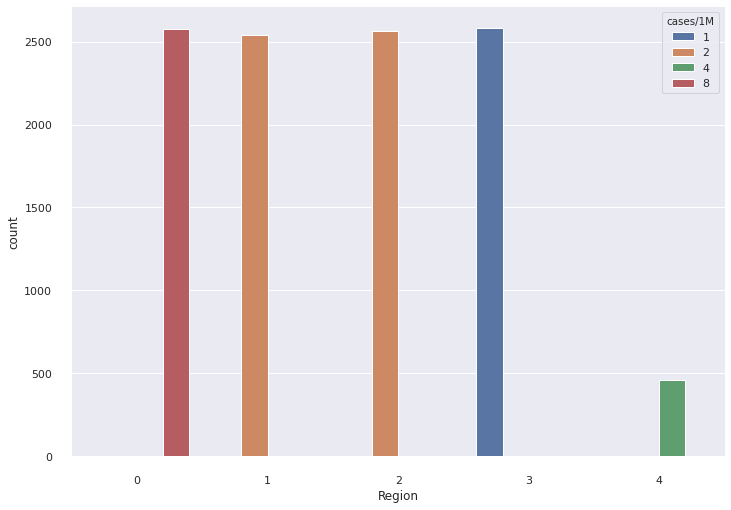

In [ ]:
# import the seaborn module
import seaborn as sns
# import the matplotlib module
import matplotlib.pyplot as plt
# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(11.7,8.27)})
# create a countplot
sns.countplot('Region',data=data_clean,hue = 'cases/1M')
# Remove the top and down margin
sns.despine(offset=10, trim=True)
# display the plotplt.show()

In [ ]:
YT= ['Infect_Prob']

In [ ]:
XT=['Region','Gender','Married','Children','Occupation','Mode_transport','cases/1M','Deaths/1M','comorbidity','Age','Coma score','Pulmonary score','cardiological pressure','Diuresis','Platelets','HBB','d-dimer','Heart rate','HDL cholesterol','Charlson Index','Blood Glucose','FT/month']

In [ ]:
X = data_clean[XT]
Y = data_clean[YT]

In [ ]:
#import the necessary module
from sklearn.model_selection import train_test_split
#split data set into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 10)

In [ ]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D,Conv2D, MaxPooling1D, AveragePooling1D, GlobalAveragePooling1D, MaxPooling2D, GlobalMaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from keras.callbacks import Callback, TensorBoard, EarlyStopping

In [ ]:
# Build Our Neural Network Model
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from keras import backend as K

def r2_score(y_true,y_pred):
    
    
    num = K.sum(K.square(y_true-y_pred))
    denom = K.sum(K.square(y_true- K.mean(y_true)))
    return (1-num/denom)

def getModel():
    model = Sequential()
    model.add(Dense(128,activation='relu',input_shape=(22,)))
    model.add(Dense(64,activation='relu',input_shape=(22,)))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1))
    
    model.compile(optimizer='adam',loss='mse',metrics=[r2_score])
    return model
    # model = Sequential()
    # model.add(Conv1D(256, 5,padding='same',
    #              input_shape=(7499,22,1)))
    # model.add(Activation('relu'))
    # model.add(Conv1D(128, 5,padding='same'))
    # model.add(Activation('relu'))
    # model.add(Dropout(0.1))
    # model.add(AveragePooling1D(pool_size=(8)))
    # model.add(Conv1D(128, 5,padding='same',))
    # model.add(Activation('relu'))
    # model.add(Conv1D(128, 5,padding='same',))
    # model.add(Activation('relu')) 
    # model.add(Flatten())
    # model.add(Dense(32))
    # model.add(Dense(16))
    # model.add(Dense(8))
    # model.add(Dense(1))
    # model.compile(optimizer='adam',loss='mse',metrics=[r2_score])
    # return model

In [ ]:
model = getModel()
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 128)               2944      
_________________________________________________________________
dense_79 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_80 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_81 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_82 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 9         
Total params: 13,953
Trainable params: 13,953
Non-trainable params: 0
_________________________________________________

In [ ]:
hist = model.fit(X_train,Y_train,epochs=30,validation_data=(X_test,Y_test),verbose=1)

Train on 7499 samples, validate on 3215 samples
Epoch 1/30
7499/7499 [==============================] - 3s 350us/step - loss: 228.0698 - r2_score: -1.5233 - val_loss: 125.2008 - val_r2_score: -0.2271
Epoch 2/30
7499/7499 [==============================] - 1s 69us/step - loss: 123.9991 - r2_score: -0.2629 - val_loss: 113.8323 - val_r2_score: -0.1218
Epoch 3/30
7499/7499 [==============================] - 1s 70us/step - loss: 119.6424 - r2_score: -0.1777 - val_loss: 110.4174 - val_r2_score: -0.0873
Epoch 4/30
7499/7499 [==============================] - 1s 75us/step - loss: 116.3020 - r2_score: -0.1525 - val_loss: 107.4741 - val_r2_score: -0.0703
Epoch 5/30
7499/7499 [==============================] - 1s 70us/step - loss: 113.4084 - r2_score: -0.1711 - val_loss: 105.3521 - val_r2_score: -0.0146
Epoch 6/30
7499/7499 [==============================] - 0s 66us/step - loss: 113.0131 - r2_score: -0.1609 - val_loss: 102.8292 - val_r2_score: -0.0099
Epoch 7/30
7499/7499 [=======================

In [ ]:
r2_score = model.evaluate(X_test,Y_test)[1]
print(r2_score)

3215/3215 [==============================] - 0s 32us/step
0.05210161646639763


In [ ]:
score = model.evaluate(X_test, Y_test,verbose=1)

print(score)

3215/3215 [==============================] - 0s 31us/step
[92.55210103914489, 0.05210161646639763]


In [ ]:
val_loss = hist.history['val_loss']
train_loss = hist.history['loss']

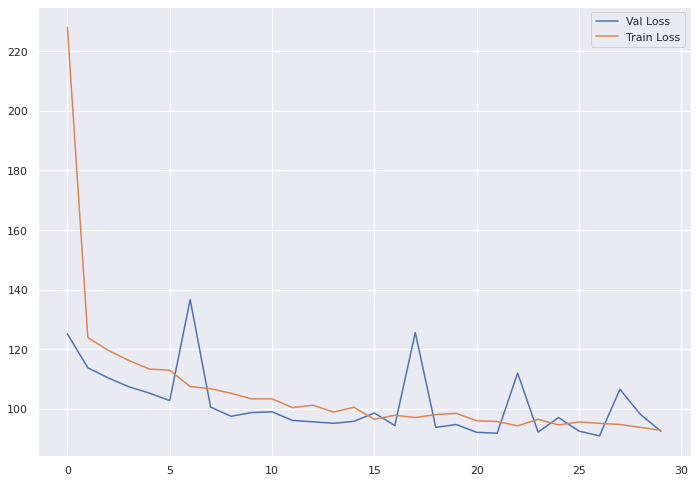

In [ ]:
import matplotlib.pyplot as plt

plt.plot(val_loss,label="Val Loss ")
plt.plot(train_loss,label="Train Loss")
plt.legend()
plt.show()

In [ ]:
r2_score_train = hist.history['r2_score']
r2_score_val = hist.history['val_r2_score']

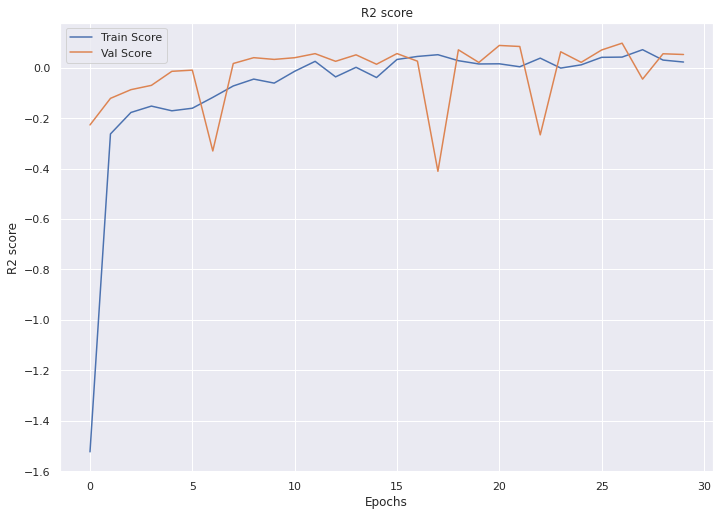

In [ ]:
plt.plot(r2_score_train,label="Train Score")
plt.plot(r2_score_val,label="Val Score")
plt.legend()
plt.title("R2 score")
plt.xlabel("Epochs")
plt.ylabel("R2 score")
plt.show()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
Y_test

,Infect_Prob
9608,53.495323
4512,47.999307
6105,90.797760
8219,48.284109
5871,47.901891
...,...
8377,48.702419
336,49.318958
1151,66.389760
2542,38.076480


In [ ]:
y = pd.DataFrame( y_pred)

In [ ]:
y

,0
0,59.403625
1,50.249390
2,61.593082
3,45.873444
4,50.958164
...,...
3210,55.266125
3211,44.269623
3212,71.194725
3213,58.814323
